# 1. Importing Libraries 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# 2. Loading and Cleaning Data with Pandas 


##  2.1.  Load data


In [7]:
columns = ['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
print(len(columns))

df = pd.read_csv('agaricus-lepiota.data', names=columns)
df.head()

23


edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [8]:
df.edibility.value_counts()


e    4208
p    3916
Name: edibility, dtype: int64

In [9]:
df.shape

(8124, 23)

## 2.2.  Print summary of the dataset

In [10]:
df.describe()

edibility cap-shape cap-surface cap-color bruises?  odor  \
count       8124      8124        8124      8124     8124  8124   
unique         2         6           4        10        2     9   
top            e         x           y         n        f     n   
freq        4208      3656        3244      2284     4748  3528   

       gill-attachment gill-spacing gill-size gill-color  ...  \
count             8124         8124      8124       8124  ...   
unique               2            2         2         12  ...   
top                  f            c         b          b  ...   
freq              7914         6812      5612       1728  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq                       4936                   4464                   4384   

       veil-type veil-color ring-number ring-type spore-print-color  \
count       8124       8124        8124      8124              8124   
unique         1          4           3         5                 9   
top            p          w           o         p                 w   
freq        8124       7924        7488      3968              2388   

       population habitat  
count        8124    8124  
unique          6       7  
top             v       d  
freq         4040    3148  

[4 rows x 23 columns]

## 2.3. Check null values for all the colums in the dataset

In [11]:
df.isnull().sum()

edibility                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 2.4. Check datatypes of all the columns

In [12]:
df.dtypes

edibility                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## 2.5 Cleaning data


In [13]:

df = df.replace('?', np.nan)
df.head() 


edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [14]:
df.isnull().sum()

edibility                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

# 3. Handling Missing Values 


In [15]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head()

edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [16]:
nan_categorical  = categorical_features.loc[categorical_features.isna().any(axis=1)]
nan_categorical

edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
3984         e         x           y         b        t    n               f   
4023         p         x           y         e        f    y               f   
4076         e         f           y         u        f    n               f   
4100         p         x           y         e        f    y               f   
4104         p         x           y         n        f    f               f   
...        ...       ...         ...       ...      ...  ...             ...   
8119         e         k           s         n        f    n               a   
8120         e         x           s         n        f    n               a   
8121         e         f           s         n        f    n               a   
8122         p         k           y         n        f    y               f   
8123         e         x           s         n        f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
3984            c         b          e  ...                        s   
4023            c         n          b  ...                        s   
4076            c         n          h  ...                        f   
4100            c         n          b  ...                        s   
4104            c         n          b  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
3984                      e                      w         p          w   
4023                      w                      w         p          w   
4076                      w                      w         p          w   
4100                      p                      p         p          w   
4104                      p                      p         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
3984           t         e                 w          c       w  
4023           o         e                 w          v       p  
4076           o         f                 h          y       d  
4100           o         e                 w          v       d  
4104           o         e                 w          v       l  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[2480 rows x 23 columns]

## 3.1. Handling Missing values for Categorical variable


In [18]:

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(categorical_features)
imp = imp.transform(categorical_features)
imp

array([['p', 'x', 's', ..., 'k', 's', 'u'],
       ['e', 'x', 's', ..., 'n', 'n', 'g'],
       ['e', 'b', 's', ..., 'n', 'n', 'm'],
       ...,
       ['e', 'f', 's', ..., 'b', 'c', 'l'],
       ['p', 'k', 'y', ..., 'w', 'v', 'l'],
       ['e', 'x', 's', ..., 'o', 'c', 'l']], dtype=object)

In [19]:
categorical_features = pd.DataFrame(imp, columns=categorical_features.columns)
categorical_features.head()

edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [20]:
categorical_features.isnull().sum()

edibility                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 5. Encode Categorical data



In [21]:
target = categorical_features['edibility']
targetdf = pd.DataFrame(target, columns=['edibility'])
targetdf.head()

edibility
0         p
1         e
2         e
3         p
4         e

In [22]:

label_enc = LabelEncoder()
target_enc = label_enc.fit_transform(targetdf['edibility'])
y = target_enc
y

array([1, 0, 0, ..., 0, 1, 0])

In [23]:
categoricalX = categorical_features.drop(columns='edibility', axis=1)
categoricalX

cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0            x           s         n        t    p               f   
1            x           s         y        t    a               f   
2            b           s         w        t    l               f   
3            x           y         w        t    p               f   
4            x           s         g        f    n               f   
...        ...         ...       ...      ...  ...             ...   
8119         k           s         n        f    n               a   
8120         x           s         n        f    n               a   
8121         f           s         n        f    n               a   
8122         k           y         n        f    y               f   
8123         x           s         n        f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  ...   
2               c         b          n           e  ...   
3               c         n          n           e  ...   
4               w         b          k           t  ...   
...           ...       ...        ...         ...  ...   
8119            c         b          y           e  ...   
8120            c         b          y           e  ...   
8121            c         b          n           e  ...   
8122            c         n          b           t  ...   
8123            c         b          y           e  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-type veil-color ring-number ring-type spore-print-color population  \
0            p          w           o         p                 k          s   
1            p          w           o         p                 n          n   
2            p          w           o         p                 n          n   
3            p          w           o         p                 k          s   
4            p          w           o         e                 n          a   
...        ...        ...         ...       ...               ...        ...   
8119         p          o           o         p                 b          c   
8120         p          n           o         p                 b          v   
8121         p          o           o         p                 b          c   
8122         p          w           o         e                 w          v   
8123         p          o           o         p                 o          c   

     habitat  
0          u  
1          g  
2          m  
3          u  
4          g  
...      ...  
8119       l  
8120       l  
8121       l  
8122       l  
8123       l  

[8124 rows x 22 columns]

In [24]:
# categorical_features = pd.get_dummies(categoricalX)
# categorical_features.head()

In [25]:
enc = OrdinalEncoder()
categorical_features = pd.DataFrame(enc.fit_transform(categoricalX), columns=categoricalX.columns)
categorical_features.head()

cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0        5.0          2.0        4.0       1.0   6.0              1.0   
1        5.0          2.0        9.0       1.0   0.0              1.0   
2        0.0          2.0        8.0       1.0   3.0              1.0   
3        5.0          3.0        8.0       1.0   6.0              1.0   
4        5.0          2.0        3.0       0.0   5.0              1.0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0           0.0        1.0         4.0          0.0  ...   
1           0.0        0.0         4.0          0.0  ...   
2           0.0        0.0         5.0          0.0  ...   
3           0.0        1.0         5.0          0.0  ...   
4           1.0        0.0         4.0          1.0  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                       2.0                     7.0                     7.0   
1                       2.0                     7.0                     7.0   
2                       2.0                     7.0                     7.0   
3                       2.0                     7.0                     7.0   
4                       2.0                     7.0                     7.0   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0        0.0         2.0          1.0        4.0                2.0   
1        0.0         2.0          1.0        4.0                3.0   
2        0.0         2.0          1.0        4.0                3.0   
3        0.0         2.0          1.0        4.0                2.0   
4        0.0         2.0          1.0        0.0                3.0   

   population  habitat  
0         3.0      5.0  
1         2.0      1.0  
2         2.0      3.0  
3         3.0      5.0  
4         0.0      1.0  

[5 rows x 22 columns]

In [26]:
categorical_features.dtypes

cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises?                    float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [27]:
X = categorical_features

# 6. Training Model 

## 6.1. Train test split


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

## 6.2 Train the model


In [29]:

lgr = LogisticRegression()

# train the model using the training sets
lgr.fit(X_train, y_train)



C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:

from sklearn.neighbors import KNeighborsClassifier
  

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
  


KNeighborsClassifier(n_neighbors=2)

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)


DecisionTreeClassifier()

# 7. Evaluating the model 


#### Score of Logistic Regression model

In [32]:
lgr.score(X_train, y_train)

0.9564548392060317

In [33]:
lgr.score(X_test, y_test)

0.9563076923076923

In [34]:

y_pred = lgr.predict(X_test)


In [35]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')


0.9562965042127709

Text(111.5, 0.5, 'Truth')

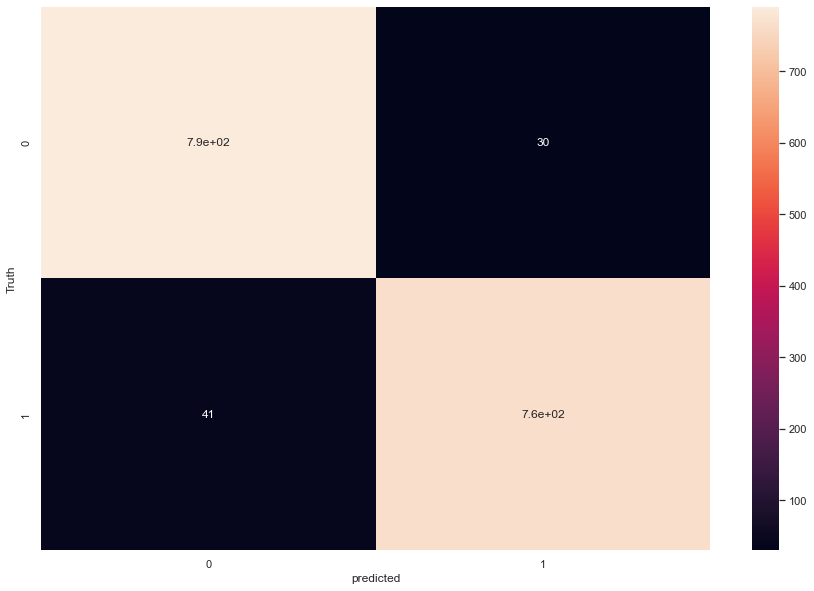

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)

sns.set(rc={'figure.figsize':(15,10)})

sns.heatmap(data=matrix,annot=True)

plt.xlabel("predicted")
plt.ylabel("Truth")

#### Score of KNN

In [37]:
knn.score(X_train, y_train)

1.0

In [38]:
knn.score(X_test, y_test)

0.9981538461538462

In [39]:
y_pred = knn.predict(X_test)
  


In [40]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

0.9981536196062495

Text(111.5, 0.5, 'Truth')

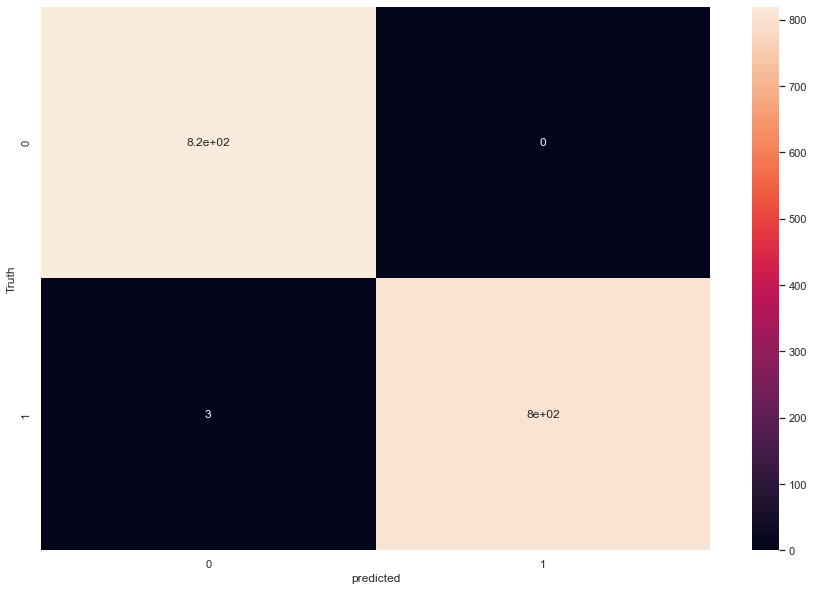

In [41]:
from sklearn.metrics import confusion_matrix, f1_score
matrix = confusion_matrix(y_test,y_pred)

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

#### Score of Decision Tree Classifier

In [42]:
dtmodel.score(X_train, y_train)

1.0

In [43]:
dtmodel.score(X_test, y_test)

1.0

In [44]:
y_pred = dtmodel.predict(X_test)

In [45]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

1.0

Text(111.5, 0.5, 'Truth')

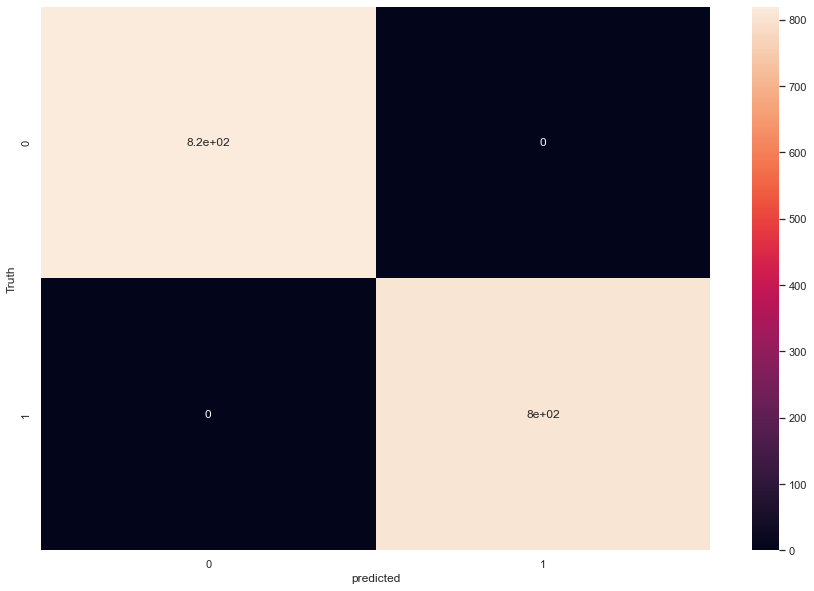

In [46]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# 8. Making Prediction 


In [47]:
np.array(X_test.head(1))

array([[2., 2., 8., 0., 5., 1., 1., 0., 3., 1., 2., 0., 0., 7., 7., 0.,
        2., 1., 0., 2., 0., 1.]])

In [231]:
lgr.predict(X_test.head(1))

array([0])

The predicted edibility is 1, so an mushroom species is poisonous

## Thank You

### Group 5
- Sonam Cheda(12190076)
- Sonam Choden(12190077)
- SOnam Yangchen(12190084)
- Ugyen Wangdi(12190105)